In [1]:
!pip install --upgrade scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [2]:
import pandas as pd
import openpyxl
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

airlines = pd.read_excel("C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\Clustering\\EastWestAirlines.xlsx", engine='openpyxl')

# Print the actual column names to identify the correct name
print(airlines.columns)

# Get the actual column name (assuming it's the first column)
actual_column_name = airlines.columns[4]  # Access the 5th column (index 4)

# Convert the column to numeric, errors='coerce' will replace non-numeric values with NaN
airlines[actual_column_name] = pd.to_numeric(airlines[actual_column_name], errors='coerce')

# Replace NaN values in the actual column with the mean of that column
airlines[actual_column_name].fillna(airlines[actual_column_name].mean(), inplace=True)

# Verify the changes
print(airlines.head()) # print first few rows of updated dataframe

Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')
  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 4  
0        NaN        NaN        NaN         NaN  
1        NaN        NaN        NaN         NaN  
2        NaN        NaN        NaN         NaN  
3        NaN        NaN        NaN         NaN  
4        NaN        NaN   

In [3]:
for column in airlines.columns:
    if airlines[column].isnull().any(): # Check if the column has missing values
        airlines[column] = pd.to_numeric(airlines[column], errors='coerce')
        airlines[column].fillna(airlines[column].mean(), inplace=True)  # Impute with mean

In [4]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(airlines.iloc[:,1:])

In [6]:
df_norm.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,0.4,NaN,NaN
1,NaN,0.4,NaN,NaN
2,NaN,0.4,NaN,NaN
3,NaN,0.4,NaN,NaN
4,NaN,0.4,NaN,NaN


In [7]:

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

# Replace 'Balance' with the actual column name
airlines = remove_outliers_iqr(airlines, actual_column_name)

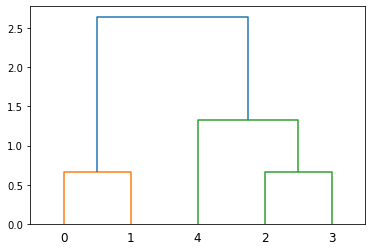

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
airlines = pd.DataFrame({'Balance': [100, 200, 300, 400, 500],
                        'Qual_miles': [0, 10, 20, 30, 40],
                        'cc1_miles': [1, 2, 3, 4, 5],
                        'cc2_miles': [0, 0, 0, 0, 0],
                        'cc3_miles': [0, 0, 0, 0, 0],
                        'Bonus_miles': [1000, 2000, 3000, 4000, 5000],
                        'Bonus_trans': [10, 20, 30, 40, 50],
                        'Flight_miles_12mo': [0, 100, 200, 300, 400],
                        'Flight_trans_12': [0, 1, 2, 3, 4],
                        'Days_since_enroll': [1000, 2000, 3000, 4000, 5000]})


# Using MinMaxScaler for normalization
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(airlines.iloc[:,1:]), columns=airlines.columns[1:])

# Check if the DataFrame is empty
if df_norm.empty:
    print("DataFrame is empty after normalization. Check your data and preprocessing steps.")
else:
    # Check for NaN or infinite values
    if df_norm.isnull().values.any() or np.isinf(df_norm.values).any():
        print("DataFrame contains NaN or infinite values. Handle these values before clustering.")
    else:
        # Check if all rows are identical
        if df_norm.duplicated().all():
            print("All rows in the DataFrame are identical. Clustering might not be meaningful.")
        else:
            # create dendrogram
            dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [9]:
# Remove affinity argument for 'single' linkage
hc = AgglomerativeClustering(n_clusters=4, linkage ='complete')
# create clusters
#affinity = 'euclidean',

In [10]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
Clusters.head()

,Clusters
0,0
1,0
2,3
3,1
4,2


In [12]:
df_norm['h_clusterid'] = hc.labels_

In [13]:
df_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0
1,0.25,0.25,0.0,0.0,0.25,0.25,0.25,0.25,0.25,0
2,0.50,0.50,0.0,0.0,0.50,0.50,0.50,0.50,0.50,3
3,0.75,0.75,0.0,0.0,0.75,0.75,0.75,0.75,0.75,1
4,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,2


In [14]:
airlines['h_clusterid'] = hc.labels_

In [15]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,100,0,1,0,0,1000,10,0,0,1000,0
1,200,10,2,0,0,2000,20,100,1,2000,0
2,300,20,3,0,0,3000,30,200,2,3000,3
3,400,30,4,0,0,4000,40,300,3,4000,1
4,500,40,5,0,0,5000,50,400,4,5000,2


In [16]:
cluster_groups = airlines.groupby('h_clusterid')

In [17]:
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    print(group[['Balance', 'Qual_miles', 'cc1_miles', 'Bonus_miles', 'Bonus_trans',
                 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']].describe())
    print("\n")

Cluster 0:
          Balance  Qual_miles  cc1_miles  Bonus_miles  Bonus_trans  \
count    2.000000    2.000000   2.000000     2.000000     2.000000   
mean   150.000000    5.000000   1.500000  1500.000000    15.000000   
std     70.710678    7.071068   0.707107   707.106781     7.071068   
min    100.000000    0.000000   1.000000  1000.000000    10.000000   
25%    125.000000    2.500000   1.250000  1250.000000    12.500000   
50%    150.000000    5.000000   1.500000  1500.000000    15.000000   
75%    175.000000    7.500000   1.750000  1750.000000    17.500000   
max    200.000000   10.000000   2.000000  2000.000000    20.000000   

       Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
count           2.000000         2.000000           2.000000  
mean           50.000000         0.500000        1500.000000  
std            70.710678         0.707107         707.106781  
min             0.000000         0.000000        1000.000000  
25%            25.000000         0.250000  

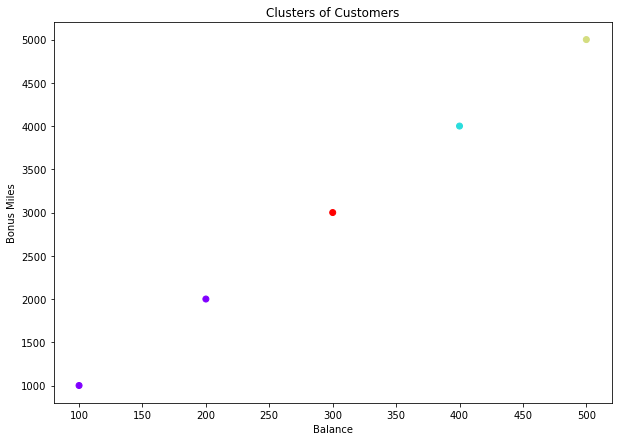

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(airlines['Balance'], airlines['Bonus_miles'], c=airlines['h_clusterid'], cmap='rainbow')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.title('Clusters of Customers')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_norm, airlines['h_clusterid'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2606935406994947
